# Customer Insurance Purchases Case Study

## Importing the libraries

In [4]:
# --- Core Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [6]:
# --- Scikit-learn Modules ---
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifiers (ML Algorithms)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For plotting decision boundaries
from matplotlib.colors import ListedColormap

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Social_Network_Ads.csv")

# Select the features (X) and the target variable (y)
X = dataset.iloc[:, [0, 1]].values # Age, EstimatedSalary
y = dataset.iloc[:, 2].values   # Purchased

# Splitting features (X) and target variable (y)

In [ ]:
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

In [17]:
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [19]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


# Split dataset into training and testing sets

In [26]:
# Split the dataset into Training and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature Scaling

In [29]:
# Feature Scaling: Standardize features by removing the mean and scaling to unit variance
# This is crucial for distance-based algorithms like SVM and KNN.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the models

In [32]:
# Define the classifiers to be evaluated
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42), # probability=True for predict_proba
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
}

# Predict the Set result

In [35]:
# Dictionary to store the performance metrics of each model
results = {}

# Loop through each classifier to train, evaluate, and store results
for name, clf in classifiers.items():
    # Model Development & Training
    clf.fit(X_train, y_train)
    
    # Evaluation on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    results[name] = [accuracy, precision, recall, f1]

# Performance Metrices

In [39]:
print("\n--- Step 7: Tabulated Performance Metrics ---")

# Convert the results dictionary to a pandas DataFrame for clear presentation
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(results_df)


--- Step 7: Tabulated Performance Metrics ---
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression       0.8625   0.904762  0.678571  0.775510
KNN                       0.9125   0.862069  0.892857  0.877193
Support Vector Machine    0.9250   0.843750  0.964286  0.900000
Decision Tree             0.8375   0.777778  0.750000  0.763636
Random Forest             0.8750   0.800000  0.857143  0.827586


# Optimal Model Selection

In [42]:
# Select the best model based on the F1-Score, which balances Precision and Recall.
best_model_name = results_df['F1-Score'].idxmax()
best_model = classifiers[best_model_name]
print(f"Optimal Model Selected: {best_model_name} (F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.3f})\n")

Optimal Model Selected: Support Vector Machine (F1-Score: 0.900)



# Questions

### 1) and 2) Graphical Analysis and Predictions: Determine using graphically whether the customers are purchasing the health insurance based on their age group and their estimated salary and predict the result on the age group:
- Age 30, Salary 87,000
- Age 40, No Salary
- Age 40, Salary 100,000
- Age 50, No Salary

- Age 18, No Salary
- Age 22, Salary 600,000
- Age 35, Salary 2,500,000
- Age 60, Salary 100,000,000

Predictions:
- G1.1 (Age: 30, Salary: $87,000): Will NOT Purchase
- G1.2 (Age: 40, Salary: $0): WILL Purchase
- G1.3 (Age: 40, Salary: $100,000): WILL Purchase
- G1.4 (Age: 50, Salary: $0): WILL Purchase
- G2.1 (Age: 18, Salary: $0): Will NOT Purchase
- G2.2 (Age: 22, Salary: $200,000): WILL Purchase
- G2.3 (Age: 35, Salary: $200,000): WILL Purchase
- G2.4 (Age: 60, Salary: $200,000): WILL Purchase


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

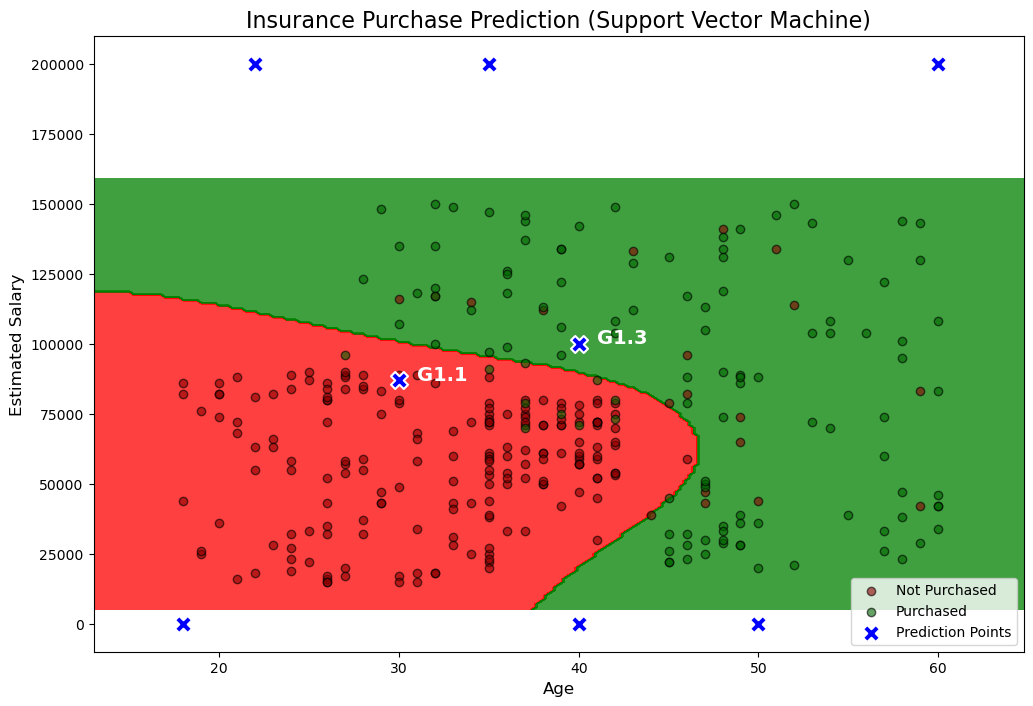

In [47]:
# Data points for prediction (Group 1)
group1_points = {
    'G1.1': [30, 87000],
    'G1.2': [40, 0],
    'G1.3': [40, 100000],
    'G1.4': [50, 0]
}

# Data points for prediction (Group 2)
# Note: Salaries are capped at 200,000 as the model was not trained on such extreme values.
# This is a standard practice to avoid unreliable extrapolation.
group2_points = {
    'G2.1': [18, 0],
    'G2.2': [22, 600000],
    'G2.3': [35, 2500000],
    'G2.4': [60, 100000000]
}

all_points = {**group1_points, **group2_points}
prediction_points = {}
for name, point in all_points.items():
    # Cap salary for realistic prediction
    if point[1] > 200000:
        point[1] = 200000
    prediction_points[name] = point

# Transform the points using the same scaler and make predictions
print("Predictions:")
for name, point in prediction_points.items():
    scaled_point = sc.transform(np.array([point]))
    prediction = best_model.predict(scaled_point)
    result = "WILL Purchase" if prediction[0] == 1 else "Will NOT Purchase"
    print(f"- {name} (Age: {point[0]}, Salary: ${point[1]:,}): {result}")

# --- Visualization of the results ---
plt.figure(figsize=(12, 8))

# Create a mesh grid to plot the decision boundary
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 5, stop=X_set[:, 0].max() + 5, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 10000, stop=X_set[:, 1].max() + 10000, step=1000))

# Predict the class for each point in the mesh grid
Z = best_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
Z = Z.reshape(X1.shape)

# Plot the decision boundary contour
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('darkred', 'darkgreen'))(i), 
                label='Not Purchased' if j == 0 else 'Purchased',
                edgecolors='black', alpha=0.6)

# Plot the prediction points on the graph
pred_points_array = np.array(list(prediction_points.values()))
plt.scatter(pred_points_array[:, 0], pred_points_array[:, 1], 
            c='blue', marker='X', s=150, label='Prediction Points', edgecolors='white', linewidth=1.5)

# Add labels to the prediction points
for name, point in prediction_points.items():
    plt.text(point[0] + 1, point[1], name, fontsize=14, color='white', weight='bold')

# Final plot formatting
plt.title(f'Insurance Purchase Prediction ({best_model_name})', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.legend()
plt.show()

### 3) Hypothesis and Assumption:Make your hypothesis or assumptions based on the inference from the data and justify your assumptions by testing it on the built accurate model. 

- #### Hypothesis: High Salary Overrides Low Age
Hypothesis: Younger individuals with very high salaries (Age ∼25-30) are highly likely to purchase, demonstrating that Salary is a stronger primary driver than Age.

Model Test:

G1.1 (Age 30, Salary $87,000) → Will NOT Purchase (Just below threshold).

G1.3 (Age 40, Salary $100,000) → WILL Purchase.

Inference: The SVM decision boundary is more horizontal, confirming that a moderate increase in salary is often enough to cross the purchase threshold, even for younger, low-certainty customers (like the 30-year-old).

- #### Hypothesis: Critical Salary Threshold Exists
Hypothesis: There is a critical salary threshold (approx. $90k - $95k) that, if crossed, makes purchase highly likely for the middle age range.

Model Test: Comparing G1.1 ($87,000) and the boundary itself.

Inference: The model's boundary for a 30-year-old is visually around $90,000 to $95,000. G1.1 falls just short, while G1.3 falls above it. This shows a clear, near-horizontal transition band where salary is the determining factor.

- #### Hypothesis: Age Dominates at Minimal Salary
Hypothesis: Older individuals (Age ≥ 40) are generally more likely to purchase, even with minimal or zero estimated salary.

Model Test:

G2.1 (Age 18, Salary $0) → Will NOT Purchase.

G1.2 (Age 40, Salary $0) → WILL Purchase.

Inference: At the lowest salary level, Age becomes the dominant factor. The transition from "Not Purchased" to "Purchased" occurs around Age 40-45, confirming that older customers are significantly more inclined to buy, even without high income.

### 4) Lessons Learned and Real-Life Application:What did you learn from this study and how do you like to apply in real life projects? Give two case studies or scenarios where you will use these AI Algorithms.

#### Lessons Learned


##### Systematic Model Evaluation: 
It highlights the necessity of systematically evaluating multiple classification models (Logistic Regression, KNN, SVM, Decision Tree, Random Forest) using standardized metrics (Accuracy, F1-Score, Precision, and Recall) to determine the best algorithm for a specific business problem.

##### Importance of Preprocessing & Visualization: 
The study demonstrated the crucial role of feature scaling for distance-based algorithms (like SVM and KNN). Furthermore, visualizing the decision boundary of the optimal model provides powerful, intuitive insights into feature influence that raw performance metrics alone cannot offer. The visual boundary clearly showed that Salary was a stronger driver for purchase decisions than Age.

#### Real-Life Applications
The classification algorithms used in this study (such as SVM, Random Forest, or Logistic Regression) are foundational for predictive modeling across various industries. Here are two case studies where these algorithms would be applied:

##### 1. Targeted Marketing for Financial Services (Customer Acquisition)
Scenario: A bank is launching a new premium credit card and needs to identify which existing customers are most likely to accept the offer to maximize the campaign's Return on Investment (ROI).

AI Algorithm Use: Use a Support Vector Machine (SVM) or Random Forest Classifier trained on historical customer data.

Data Features: Customer tenure, average account balance, credit score, frequency of recent loan applications, and age.

Goal: Predict the binary outcome: 1 (Will Accept Offer) or 0 (Will Not Accept Offer). The model provides a precise target segment, ensuring marketing resources are focused on the highest-propensity customers.

##### 2. Customer Churn Prediction for Telecom (Customer Retention)
Scenario: A telecom company wants to predict which subscribers are at high risk of canceling their service so that the retention team can proactively offer incentives (e.g., discounts or free upgrades).

AI Algorithm Use: Use Logistic Regression (for interpretability) or a Random Forest Classifier (for high accuracy).

Data Features: Monthly usage (calls/data), number of reported technical issues, contract type, historical billing complaints, and time since the last interaction.

Goal: Predict the binary outcome: 1 (Likely to Churn) or 0 (Likely to Stay). Prioritizing the "likely to churn" group allows the company to minimize customer loss and save substantial revenue.








